**<h1><center>CS 464</center></h1>**
**<h1><center>Introduction to Machine Learning</center></h1>**
**<h1><center>Fall 2021</center></h1>**
**<h1><center>Homework 3</center></h1>**
<h4><center>Due: Jan 02, 2022 17:00 (GMT+3)</center></h4>

### Instructions

<ul>
    <li>
    This homework contains both written and programming questions about neural networks. You should implement programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
    For questions that you need to plot, your plot results have to be included in the cell output. For written questions, you may provide them either as comments in code cells or as seperate text cells. 
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use different libraries than given libraries in the code segments of this homework except for libraries inclueded in Python Standard Library (https://docs.python.org/3/library/).
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
    While submitting the homework file, please package notebook(".ipynb") and model (".pth") files as a gzipped TAR file or a ZIP file with the name cs464_hw3_section#_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and model files. Upload your homework to Moodle.
    </li>
    <li>
    This is an individual assignment for each student. That is, you are NOT allowed to share your work with your classmates.</li>
    <li> 
    If you do not follow the submission routes, deadlines and specifications, it will lead to a significant grade deduction.
    </li>
    <li> 
    If you have any questions, please contact "hakansivuk@gmail.com".
    </li>

</ul>

## Environment Setup

This homewrok is prepeared by using Google CoLab which already has required libraries. However, if you are using your own local Jupyter or any other Python notebook editor, you may use both anaconda or pip to install PyTorch to your own computer.

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

#### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries, replace the "package_name" in the following command and run it in activated "hw3" environment <br>
        <i>> pip install "package_name"<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>


#### Pytorch Installation with Anaconda

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

###Pip3 Installation
<ul>
    <li>Download pip3 from https://pip.pypa.io/en/stable/installing/</li>
    <li>If you are using Windows, you may need to add Python to your enviroment variables. You may use the following tutorial to install Python and pip.
    https://phoenixnap.com/kb/how-to-install-python-3-windows</li>
</ul>

#### PyTorch Installation with Pip
<ul>
<li>For MacOS:<br>
    <i>> pip3 install torch torchvision</i>
</li>
<li>For Linux:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i>
</li>
<li>For Windows:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i><br>
</li>


##Question 1 [12 pts.]

Answer the given questions with **at most a sentence**.

  >a) Why do people use validation data?<br>

  >b) What is the difference between mean squared error and mean absolute error?  <br>

  >c) What is the main problem of using sigmoid as activation function in an artificial neural network (ANN)?<br>

>d) What does it mean to overfit your data model?<br>

  >e) Your input image size is 3x64x64. If you apply 3x3 convolution with input_channel=3, output_channel=6, padding=0, stride=2, what would be the size of the output?<br>

  >f) In the previous question, how many trainable parameters are there? (you should also consider bias terms in addition to weights)<br>




### a) The validation dataset provides an unbiased evaluation of a model fit on the training dataset while tuning the models hyperparamaters.

### b) 	Mean Absolute Error fails to punish large errors in prediction while Mean Squared Error is 		more sensitive while catching larger errors compared to MAE. 

### c)	The logistic sigmoid function can cause a neural network to get stuck at the training time, 		computationally costly and hard to learn compared to ReLU.

### d) 	Overfitting is a modeling error that occurs when a function is too closely aligned to a limited 	set of data points, where the model is useful in reference only to its initial dataset and not to any other dataset, not generalizable

### e) 	We will have an output of 31 x 31 x 6, where width, height = 31 and channels = 6

### f) 	It introduces (F*F*D) weights per filter , for a total of (F*F*D)*K and K biases. Resulting 			3*3*3*6 = 162 	weights and 6 biases. Resulting 168 trainable parameters.

##Question 2 [88 pts.]

Computer vision (CV) is the field of study that deals with how computers can gain high-level understanding from digital images or videos. Your task for this question is to classify scenes according to their contexts by using simple machine learning algorithms developed for CV problems on scene images.

Your dataset consist of scene images from 4 contexts. Images of each context is stored under separate folders in the compressed file given to you.  The dataset has been processed in such a way that each class has approximately 2500 samples.

Download the dataset from the following link:
<br>
https://drive.google.com/file/d/1l51t3aTY7B131fwq92ACI_b_D5Idq5In/view?usp=sharing
<br>

Libraries that are required in this question is given in the following code cell.

In [193]:
# Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import os
# To Read Data
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
# To Interpret results & obtain plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score,mean_squared_error
import matplotlib.pyplot as plt

# You could add your own libraries form Python Standard Library in this cell. Any other external libraries are not allowed.
import cv2
import glob
import random
from torchvision import transforms
import copy
import json

### Data Loader [6 pts.]

An important part of such a task is to implement your own data loader. In this homework, a partial loader is provided to you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below to create your custom "SceneDataset" class which will be able to load your dataset. Implement the functions whose proptotypes are given. Follow the TODO notes below. You have to divide the files into three sets as <b>train (70%)</b>, 
<b>validation (10%)</b> and **test (20%)** sets.  These non-overlapping splits, which are subsets of SceneDataset, should be retrieved using the "get_dataset" function.

Hint: The dataset is not normalized and your results will heavily depend on your input.

In [105]:
from torchvision.transforms.transforms import ToTensor
# define custom transform
# here we are using our calculated
# mean & std
transform_norm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

In [106]:
def process_paths():
    data_dir = 'data/'
    print(os.listdir(data_dir))
    classes = os.listdir(data_dir)
    print(classes)  
    for c in classes:
      list = os.listdir(data_dir + c) # dir is your directory path
      number_files = len(list)
      print(c + ' has ' + str(number_files) + ' images')
    sea_paths = []
    glacier_paths = []
    forest_paths = []
    mountain_paths = []
    for data_path in glob.glob(data_dir + classes[0] + '/*'):
        sea_paths.append(data_path)
    for data_path in glob.glob(data_dir + classes[1] + '/*'):
        glacier_paths.append(data_path)
    for data_path in glob.glob(data_dir + classes[2] + '/*'):
        forest_paths.append(data_path)
    for data_path in glob.glob(data_dir + classes[3] + '/*'):
        mountain_paths.append(data_path)

    random.shuffle(sea_paths)
    random.shuffle(glacier_paths)
    random.shuffle(forest_paths)
    random.shuffle(mountain_paths)

    train_paths1, validation_paths1, test_paths1 = sea_paths[:int(0.7*len(sea_paths))], sea_paths[int(0.7*len(sea_paths)):int(0.8*len(sea_paths))], sea_paths[int(0.8*len(sea_paths)):]
    train_paths2, validation_paths2, test_paths2 = glacier_paths[:int(0.7*len(glacier_paths))], glacier_paths[int(0.7*len(glacier_paths)):int(0.8*len(glacier_paths))], glacier_paths[int(0.8*len(glacier_paths)):]
    train_paths3, validation_paths3, test_paths3 = forest_paths[:int(0.7*len(forest_paths))], forest_paths[int(0.7*len(forest_paths)):int(0.8*len(forest_paths))], forest_paths[int(0.8*len(forest_paths)):]
    train_paths4, validation_paths4, test_paths4 = mountain_paths[:int(0.7*len(mountain_paths))], mountain_paths[int(0.7*len(mountain_paths)):int(0.8*len(mountain_paths))], mountain_paths[int(0.8*len(mountain_paths)):]

    train_path = train_paths1 + train_paths2 + train_paths3 + train_paths4
    validation_path = validation_paths1 + validation_paths2 + validation_paths3 + validation_paths4
    test_path = test_paths1 + test_paths2 + test_paths3 + test_paths4

    random.shuffle(train_path)
    random.shuffle(validation_path)
    random.shuffle(test_path)
    return train_path, validation_path, test_path

In [107]:
#      Create dictionary for class indexes
data_dir = 'data/'
classes = os.listdir(data_dir)
idx_to_class = {i:j for i, j in enumerate(classes)}
class_to_idx = {value:key for key,value in idx_to_class.items()}
idx_to_class

{0: 'forest', 1: 'glacier', 2: 'mountain', 3: 'sea'}

In [108]:
class SceneDataset(Dataset):
    # TODO:
    # Define constructor for SceneDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, image_path, transform=False): # you are free to change parameters
        self.image_path = image_path
        self.transform = transform

    '''This function should return sample count in the dataset'''
    def __len__(self):
        return len(self.image_path)
        #return self.data.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, idx):
        image_filepath = self.image_path[idx]
        image = cv2.imread(image_filepath)
        #print(image.shape)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        label = image_filepath.split('/')[-2]
        label = class_to_idx[label]
        if self.transform is not False:
            image = self.transform(image)
        return image, label
        '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''

In [109]:
def get_dataset():
    # TODO: 
    # Read dataset files
    # Construct training, validation and test sets
    # Normalize datasets
    train_path, val_path, test_path = process_paths()
    train_dataset = SceneDataset(train_path, transform_norm)
    val_dataset = SceneDataset(val_path, transform_norm)
    test_dataset = SceneDataset(test_path, transform_norm)
    return train_dataset, val_dataset, test_dataset
train_dataset, val_dataset, test_dataset = get_dataset()

['forest', 'glacier', 'mountain', 'sea']
['forest', 'glacier', 'mountain', 'sea']
forest has 2500 images
glacier has 2500 images
mountain has 2500 images
sea has 2500 images


In [110]:
print('The shape of tensor for 50th image in train dataset: ',train_dataset[49][0].shape)
print('The label for 50th image in train dataset: ',train_dataset[49][1])

The shape of tensor for 50th image in train dataset:  torch.Size([3, 90, 90])
The label for 50th image in train dataset:  2


['forest', 'glacier', 'mountain', 'sea']
['forest', 'glacier', 'mountain', 'sea']
forest has 2500 images
glacier has 2500 images
mountain has 2500 images
sea has 2500 images


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

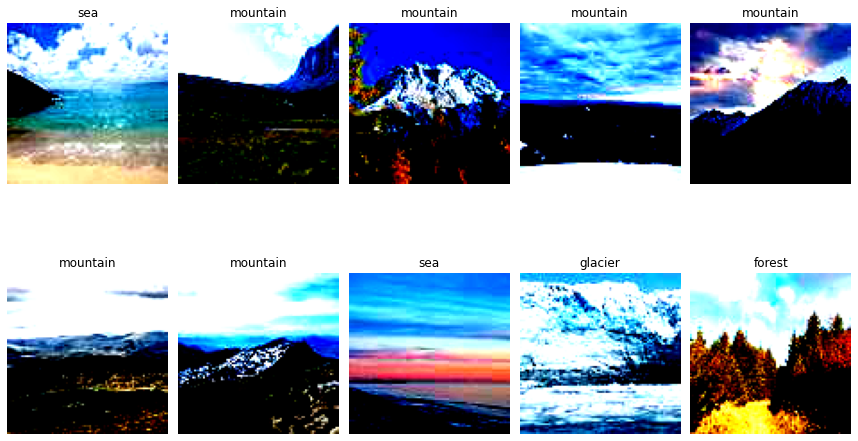

In [111]:
def visualize_normalized_images(dataset, idx=0, samples=10, cols=5, random_img = False):
    rows = samples // cols
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 8))
    for i in range(samples):
        if random_img:
            idx = np.random.randint(1,len(train_path))
        image, lab = dataset[idx]
        ax.ravel()[i].imshow(image.permute(1,2,0)) ## change the order of tensor shape
        ax.ravel()[i].set_axis_off()
        ax.ravel()[i].set_title(idx_to_class[lab])
    plt.tight_layout(pad=1)
    plt.show()    

train_path, val_path, test_path = process_paths()
visualize_normalized_images(train_dataset,np.random.randint(1,len(train_path)), random_img = True)

In [112]:
train_loader = DataLoader(
    train_dataset, batch_size=64, shuffle=True
)
valid_loader = DataLoader(
    val_dataset, batch_size=64, shuffle=True
)
test_loader = DataLoader(
    test_dataset, batch_size=64, shuffle=False
)

###Model Implementation [7 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 3 layers of convolution: 
<ul>
    <li>(1) 4 filters with size of 3 x 3 with stride 1 and padding 1, (2) ReLU </li>
    <li>(3) 8 filters with size of 3 x 3 with stride 1 and padding 1, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 16 filters with size of 3 x 3 with stride 1 and padding 1, (7) ReLU and (8) MaxPool 2 x 2 </li> 
</ul>

As the classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes and the activation function for the dense layer.

In [113]:
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self): # you can add any additional parameters you want 
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=4, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3,stride=1,padding=1)
        self.relu2 = nn.ReLU()
        self.max_pool1 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3,stride=1,padding=1)
        self.relu3 = nn.ReLU()
        self.max_pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(16*22*22,4) # output size is 4 because we have 4 different classes, input is 16*22*22 since the last layer has output in this number
        # Forward propagation implementation should be here
    def forward(self, x): # you can add any additional parameters you want
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.max_pool1(out)
        out = self.conv3(out)
        out = self.relu3(out)
        out = self.max_pool2(out)
        out = out.reshape(out.size(0),-1)
        out = self.fc1(out)
        return out

create some sample data, we want to observe the output size of the image before entering the fully connected layer, so we do experimentation

In [114]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

In [115]:
conv1 = nn.Conv2d(in_channels=3, out_channels=4, kernel_size=3, stride=1, padding=1)
relu1 = nn.ReLU()
conv2 = nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3,stride=1,padding=1)
relu2 = nn.ReLU()
max_pool1 = nn.MaxPool2d(2)
conv3 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3,stride=1,padding=1)
relu3 = nn.ReLU()
max_pool2 = nn.MaxPool2d(2)

print(images.shape)
x = conv1(images)
print(x.shape)
x = relu1(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = relu2(x)
print(x.shape)
x = max_pool1(x)
print(x.shape)
x = conv3(x)
print(x.shape)
x = relu3(x)
print(x.shape)
x = max_pool2(x)
print(x.shape) # result is used on convnet model fc layer

torch.Size([64, 3, 90, 90])
torch.Size([64, 4, 90, 90])
torch.Size([64, 4, 90, 90])
torch.Size([64, 8, 90, 90])
torch.Size([64, 8, 90, 90])
torch.Size([64, 8, 45, 45])
torch.Size([64, 16, 45, 45])
torch.Size([64, 16, 45, 45])
torch.Size([64, 16, 22, 22])


In [117]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

###Stochastic Gradient Descent [25 pts.]

####Training with SGD [15 pts.]

Train your model up to 300 epochs with properly processed inputs, i.e. call your "get_dataset" function. Use SGD as your optimizer. Tune your learning rate, weight decay. Do not add additional parameters to SGD. Save your best model as "best_cnn_sgd.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model. However, you must explain your reasoning in your choice.

During training, you need to plot two figures:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

### i played with learning rate with the range 1e-1,1e-4, when it is smaller than 1e-1, accuracy decreased since model did not learned enough, also batch size greater then 32, i.e 64 gave really small accuracies such as 0.30, i did not played with weight decay. After 16 epochs, model started overfitting and did not improved

In [91]:
# HINT: note that your training time should not take more than 2 hours.
# TODO:
# Pick your hyper parameters
max_epoch = 300
learning_rate = 1e-1 # try learning rate from the interval [1e-1, 1e-4]
weight_decay = 5e-04
batch_size=32
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Create train dataset loader,# Create validation dataset loader,# Create test dataset loader
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
valid_loader = DataLoader(val_dataset, batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False)
# initialize your network
model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()    
# define your loss function
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with weight_decay as well but do not add additional parameters
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
history = []
previous_best = 0
for epoch in range(max_epoch):
    # Training Phase
    model = model.train()
    train_losses = []
    train_acc = [] 
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [64, 3, 90, 90] = 64, 3, 8100
        # input_layer: 3 input channels, 4 output channels, 3 kernel size
        images = images.to(device)
        labels = labels.to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        train_losses.append(loss)
        acc = accuracy(outputs,labels)
        train_acc.append(acc)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()  
    # Validation Phase
    model.eval()
    validation_accuracies = []
    validation_losses = []
    with torch.no_grad():
      for images,labels in valid_loader:
          images=images.to(device)
          labels=labels.to(device)
          outputs=model(images)
          acc = accuracy(outputs,labels)
          loss = F.cross_entropy(outputs, labels)   # Calculate loss
          validation_accuracies.append(acc)
          validation_losses.append(loss)
    epoch_train_loss = torch.stack(train_losses).mean().item()
    epoch_train_acc = torch.stack(train_acc).mean().item()
    epoch_validation_loss = torch.stack(validation_losses).mean().item()
    epoch_validation_accuracy = torch.stack(validation_accuracies).mean().item()
    history.append( {'train_loss':epoch_train_loss, 'train_acc':epoch_train_acc, 'val_loss':epoch_validation_loss, 'val_acc':epoch_validation_accuracy})
    print("Epoch [{}], train_loss: {:.4f}, train_acc: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, epoch_train_loss, epoch_train_acc, epoch_validation_loss, epoch_validation_accuracy))
    
    if previous_best < epoch_validation_accuracy:
        previous_best = epoch_validation_accuracy
        print('SAVING... val_acc: {:.4f}'.format(epoch_validation_accuracy))
        torch.save(model,'models/best_cnn_sgd.pth')

Epoch [0], train_loss: 0.9640, train_acc: 0.5724, val_loss: 0.9274, val_acc: 0.5547
SAVING... val_acc: 0.5547
Epoch [1], train_loss: 0.7664, train_acc: 0.6730, val_loss: 0.7131, val_acc: 0.6914
SAVING... val_acc: 0.6914
Epoch [2], train_loss: 0.6779, train_acc: 0.7225, val_loss: 0.6947, val_acc: 0.7236
SAVING... val_acc: 0.7236
Epoch [3], train_loss: 0.6303, train_acc: 0.7419, val_loss: 0.7010, val_acc: 0.7266
SAVING... val_acc: 0.7266
Epoch [4], train_loss: 0.5768, train_acc: 0.7678, val_loss: 0.6616, val_acc: 0.7334
SAVING... val_acc: 0.7334
Epoch [5], train_loss: 0.5219, train_acc: 0.7901, val_loss: 0.8450, val_acc: 0.7002
Epoch [6], train_loss: 0.4766, train_acc: 0.8106, val_loss: 0.8454, val_acc: 0.7139
Epoch [7], train_loss: 0.4273, train_acc: 0.8306, val_loss: 0.9143, val_acc: 0.6836
Epoch [8], train_loss: 0.4021, train_acc: 0.8479, val_loss: 0.9278, val_acc: 0.7109
Epoch [9], train_loss: 0.3756, train_acc: 0.8534, val_loss: 0.9617, val_acc: 0.6875
Epoch [10], train_loss: 0.4274

Epoch [95], train_loss: 0.2704, train_acc: 0.9054, val_loss: 1.8974, val_acc: 0.6562
Epoch [96], train_loss: 0.2618, train_acc: 0.9036, val_loss: 2.4005, val_acc: 0.6582
Epoch [97], train_loss: 0.2154, train_acc: 0.9178, val_loss: 2.6258, val_acc: 0.6484
Epoch [98], train_loss: 0.2148, train_acc: 0.9248, val_loss: 2.1454, val_acc: 0.6826
Epoch [99], train_loss: 0.2395, train_acc: 0.9142, val_loss: 2.5385, val_acc: 0.6777
Epoch [100], train_loss: 0.2450, train_acc: 0.9169, val_loss: 2.3140, val_acc: 0.6650
Epoch [101], train_loss: 0.3438, train_acc: 0.8913, val_loss: 1.9533, val_acc: 0.6328
Epoch [102], train_loss: 0.2523, train_acc: 0.9043, val_loss: 2.0713, val_acc: 0.6631
Epoch [103], train_loss: 0.1823, train_acc: 0.9311, val_loss: 2.3819, val_acc: 0.6631
Epoch [104], train_loss: 0.1906, train_acc: 0.9277, val_loss: 2.2327, val_acc: 0.6699
Epoch [105], train_loss: 0.1968, train_acc: 0.9338, val_loss: 2.2156, val_acc: 0.6689
Epoch [106], train_loss: 0.1714, train_acc: 0.9390, val_los

Epoch [191], train_loss: 0.0311, train_acc: 0.9923, val_loss: 2.8507, val_acc: 0.6719
Epoch [192], train_loss: 0.0313, train_acc: 0.9913, val_loss: 3.2231, val_acc: 0.6943
Epoch [193], train_loss: 0.0139, train_acc: 0.9967, val_loss: 3.4059, val_acc: 0.7031
Epoch [194], train_loss: 0.1552, train_acc: 0.9606, val_loss: 2.5175, val_acc: 0.6816
Epoch [195], train_loss: 0.0474, train_acc: 0.9870, val_loss: 3.2242, val_acc: 0.6758
Epoch [196], train_loss: 0.0494, train_acc: 0.9840, val_loss: 3.0893, val_acc: 0.6934
Epoch [197], train_loss: 0.0189, train_acc: 0.9954, val_loss: 3.2619, val_acc: 0.6787
Epoch [198], train_loss: 0.0150, train_acc: 0.9964, val_loss: 3.2829, val_acc: 0.6875
Epoch [199], train_loss: 0.0111, train_acc: 0.9987, val_loss: 3.1589, val_acc: 0.6816
Epoch [200], train_loss: 0.0080, train_acc: 0.9988, val_loss: 3.1878, val_acc: 0.6924
Epoch [201], train_loss: 0.0076, train_acc: 0.9989, val_loss: 3.2549, val_acc: 0.6904
Epoch [202], train_loss: 0.0089, train_acc: 0.9987, va

Epoch [287], train_loss: 0.0049, train_acc: 0.9993, val_loss: 2.7972, val_acc: 0.7041
Epoch [288], train_loss: 0.0070, train_acc: 0.9991, val_loss: 2.7177, val_acc: 0.7061
Epoch [289], train_loss: 0.0059, train_acc: 0.9993, val_loss: 2.7107, val_acc: 0.7051
Epoch [290], train_loss: 0.0054, train_acc: 0.9994, val_loss: 2.7923, val_acc: 0.7061
Epoch [291], train_loss: 0.0059, train_acc: 0.9993, val_loss: 2.7242, val_acc: 0.7070
Epoch [292], train_loss: 0.0072, train_acc: 0.9993, val_loss: 2.6706, val_acc: 0.7148
Epoch [293], train_loss: 0.0053, train_acc: 0.9993, val_loss: 2.6183, val_acc: 0.7168
Epoch [294], train_loss: 0.0147, train_acc: 0.9967, val_loss: 2.6221, val_acc: 0.6904
Epoch [295], train_loss: 0.0173, train_acc: 0.9966, val_loss: 2.4496, val_acc: 0.6992
Epoch [296], train_loss: 0.0091, train_acc: 0.9991, val_loss: 2.6204, val_acc: 0.7109
Epoch [297], train_loss: 0.0128, train_acc: 0.9977, val_loss: 2.6098, val_acc: 0.6904
Epoch [298], train_loss: 0.0259, train_acc: 0.9934, va

In [97]:
def plot_accuracies(history, title):
    train_acc = [x['train_acc'] for x in history]
    val_acc = [x['val_acc'] for x in history]
    plt.plot(train_acc, '-bx')
    plt.plot(val_acc, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Training', 'Validation'])
    plt.title(title + '-Accuracy vs. No. of epochs');
def plot_losses(history,title):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title(title + '-Loss vs. No. of epochs');

### save history to a txt file since it takes time to calculate

In [ ]:
'''
textfile = open("sgd_300_history.txt", "w")
for element in history:
    textfile.write(str(element) + "\n")
textfile.close()
'''

#### read the history from the text file if required

In [172]:
'''
import ast
count = 0
history = []
my_file = open("sgd_300_history.txt", "r")
for line in my_file:
    count += 1
    element = eval(line.strip())
    history.append(element)

'''

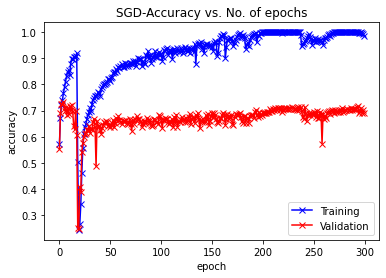

In [173]:
plot_accuracies(history, 'SGD')

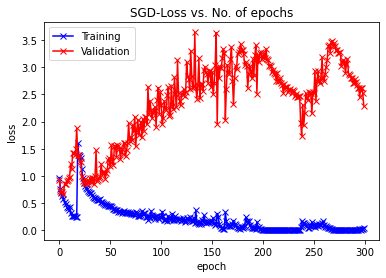

In [94]:
plot_losses(history,'SGD')

####Test with SGD [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

In [180]:
def predict_image(img, model):
    # Convert to a batch of 1
    #xb = to_device(img.unsqueeze(0), device)
    xb = img[0].unsqueeze(0)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return preds[0].item()
    #return dataset.classes[preds[0].item()]

Mean Loss: 0.381 
Mean Acc: 0.814 
Mean Macro Precision: 0.8163035168325615 
Mean Macro Recall: 0.8140000000000001 
Mean Macro F1 Score: 0.8136132016413171


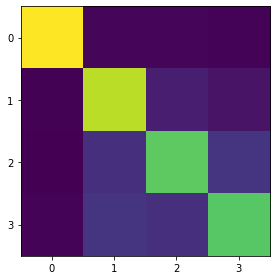

In [227]:
# Test CNN
# load best model
best_path = "models/best_cnn_sgd.pth"
model = torch.load(best_path)

# evaluate on test set
model = model.eval()
y_preds = []
y_labels = []

for image in test_dataset:
    prediction = predict_image(image,model)
    label = image[1] # image[0] has the image, image[1] has the label tensor
    y_preds.append(prediction)
    y_labels.append(label)


cfm = confusion_matrix(y_labels,y_preds)
acc = accuracy_score(y_labels,y_preds)
pre = precision_score(y_labels,y_preds,average='macro')
recall = recall_score(y_labels,y_preds,average='macro')
f1 = f1_score(y_labels,y_preds,average='macro')
losses = mean_squared_error(y_labels,y_preds)

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cfm)
# We want to show all ticks...
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))

fig.tight_layout()
plt.show()

###Adam Optimizer [25 pts.]

Adam is an adaptive learning rate optimization algorithm that has been designed specifically for training deep neural networks. It was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“.

Nowadays, most of machine learning frameworks, including tensorflow, Pytorch, and Keras, choose Adam as the default optimizer. In this question, you will experiment with it and try to understand why it replaced SGD as the default optimizer.

####Training with ADAM [15 pts.]

Train your model up to 300 epochs with properly processed inputs, i.e. call your "get_dataset". This time use Adam Optimizer as your optimizer. Tune your learning rate, weight decay. Save your best model as "best_cnn_adam.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

### I observed better results with Adams optimizer than SGD, i could use bigger batches and smaller learning rates performed better. I saw %81 accuracy with adams optimizer, while on SGD it was %73. After 20 epochs, model started to overfit and did not improved. Smaller learning rates compared to SGD performed better 

In [159]:
# HINT: note that your training time should not take more than 2 hours.
# TODO:
# Pick your hyper parameters
max_epoch = 300
learning_rate = 1e-3 # try learning rate from the interval [1e-1, 1e-4]
weight_decay = 5e-04
batch_size=64
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Create train dataset loader,# Create validation dataset loader,# Create test dataset loader
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
valid_loader = DataLoader(val_dataset, batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False)
# initialize your network
model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()    
# define your loss function
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with weight_decay as well but do not add additional parameters
# start training
# for each epoch calculate validation performance
# save best model according to validation performance

history_adam = []
previous_best = 0
for epoch in range(max_epoch):
    # Training Phase
    model = model.train()
    train_losses = []
    train_acc = [] 
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [64, 3, 90, 90] = 64, 3, 8100
        # input_layer: 3 input channels, 4 output channels, 3 kernel size
        images = images.to(device)
        labels = labels.to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        train_losses.append(loss)
        acc = accuracy(outputs,labels)
        train_acc.append(acc)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()  
    # Validation Phase
    model.eval()
    validation_accuracies = []
    validation_losses = []
    with torch.no_grad():
      for images,labels in valid_loader:
          images=images.to(device)
          labels=labels.to(device)
          outputs=model(images)
          acc = accuracy(outputs,labels)
          loss = F.cross_entropy(outputs, labels)   # Calculate loss
          validation_accuracies.append(acc)
          validation_losses.append(loss)
    epoch_train_loss = torch.stack(train_losses).mean().item()
    epoch_train_acc = torch.stack(train_acc).mean().item()
    epoch_validation_loss = torch.stack(validation_losses).mean().item()
    epoch_validation_accuracy = torch.stack(validation_accuracies).mean().item()
    history_adam.append( {'train_loss':epoch_train_loss, 'train_acc':epoch_train_acc, 'val_loss':epoch_validation_loss, 'val_acc':epoch_validation_accuracy})
    print("Epoch [{}], train_loss: {:.4f}, train_acc: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, epoch_train_loss, epoch_train_acc, epoch_validation_loss, epoch_validation_accuracy))
    
    if previous_best < epoch_validation_accuracy:
        previous_best = epoch_validation_accuracy
        print('SAVING... val_acc: {:.4f}'.format(epoch_validation_accuracy))
        torch.save(model,'models/best_cnn_adam.pth')

Epoch [0], train_loss: 0.8420, train_acc: 0.6383, val_loss: 0.7108, val_acc: 0.7211
SAVING... val_acc: 0.7211
Epoch [1], train_loss: 0.6835, train_acc: 0.7197, val_loss: 0.6569, val_acc: 0.7414
SAVING... val_acc: 0.7414
Epoch [2], train_loss: 0.5944, train_acc: 0.7666, val_loss: 0.5952, val_acc: 0.7764
SAVING... val_acc: 0.7764
Epoch [3], train_loss: 0.5344, train_acc: 0.7961, val_loss: 0.5961, val_acc: 0.7764
Epoch [4], train_loss: 0.5200, train_acc: 0.7968, val_loss: 0.5436, val_acc: 0.7990
SAVING... val_acc: 0.7990
Epoch [5], train_loss: 0.4644, train_acc: 0.8266, val_loss: 0.5441, val_acc: 0.7957
Epoch [6], train_loss: 0.4416, train_acc: 0.8373, val_loss: 0.5500, val_acc: 0.7924
Epoch [7], train_loss: 0.4236, train_acc: 0.8412, val_loss: 0.5355, val_acc: 0.8055
SAVING... val_acc: 0.8055
Epoch [8], train_loss: 0.3962, train_acc: 0.8540, val_loss: 0.5138, val_acc: 0.8072
SAVING... val_acc: 0.8072
Epoch [9], train_loss: 0.3853, train_acc: 0.8553, val_loss: 0.5266, val_acc: 0.8057
Epoc

Epoch [94], train_loss: 0.0070, train_acc: 0.9994, val_loss: 1.5182, val_acc: 0.7689
Epoch [95], train_loss: 0.0040, train_acc: 0.9999, val_loss: 1.5682, val_acc: 0.7811
Epoch [96], train_loss: 0.0047, train_acc: 0.9997, val_loss: 1.5848, val_acc: 0.7807
Epoch [97], train_loss: 0.0042, train_acc: 0.9997, val_loss: 1.5901, val_acc: 0.7855
Epoch [98], train_loss: 0.0040, train_acc: 0.9997, val_loss: 1.5933, val_acc: 0.7797
Epoch [99], train_loss: 0.0041, train_acc: 0.9997, val_loss: 1.5803, val_acc: 0.7850
Epoch [100], train_loss: 0.0027, train_acc: 0.9999, val_loss: 1.6513, val_acc: 0.7854
Epoch [101], train_loss: 0.0134, train_acc: 0.9964, val_loss: 1.7249, val_acc: 0.7682
Epoch [102], train_loss: 0.0482, train_acc: 0.9837, val_loss: 1.5623, val_acc: 0.7572
Epoch [103], train_loss: 0.0626, train_acc: 0.9810, val_loss: 1.5453, val_acc: 0.7619
Epoch [104], train_loss: 0.0123, train_acc: 0.9973, val_loss: 1.6380, val_acc: 0.7654
Epoch [105], train_loss: 0.0056, train_acc: 0.9997, val_loss

Epoch [190], train_loss: 0.0039, train_acc: 0.9997, val_loss: 1.6154, val_acc: 0.7807
Epoch [191], train_loss: 0.0022, train_acc: 0.9999, val_loss: 1.6361, val_acc: 0.7873
Epoch [192], train_loss: 0.0029, train_acc: 0.9999, val_loss: 1.6308, val_acc: 0.7791
Epoch [193], train_loss: 0.0042, train_acc: 0.9997, val_loss: 1.5602, val_acc: 0.7875
Epoch [194], train_loss: 0.0088, train_acc: 0.9982, val_loss: 1.5346, val_acc: 0.7652
Epoch [195], train_loss: 0.0224, train_acc: 0.9925, val_loss: 1.9317, val_acc: 0.7518
Epoch [196], train_loss: 0.0899, train_acc: 0.9710, val_loss: 1.5229, val_acc: 0.7668
Epoch [197], train_loss: 0.0174, train_acc: 0.9959, val_loss: 1.6100, val_acc: 0.7697
Epoch [198], train_loss: 0.0062, train_acc: 0.9991, val_loss: 1.5794, val_acc: 0.7855
Epoch [199], train_loss: 0.0036, train_acc: 0.9999, val_loss: 1.6203, val_acc: 0.7814
Epoch [200], train_loss: 0.0027, train_acc: 0.9999, val_loss: 1.6337, val_acc: 0.7811
Epoch [201], train_loss: 0.0025, train_acc: 0.9999, va

Epoch [286], train_loss: 0.0196, train_acc: 0.9949, val_loss: 1.5149, val_acc: 0.7822
Epoch [287], train_loss: 0.0041, train_acc: 0.9997, val_loss: 1.5740, val_acc: 0.7898
Epoch [288], train_loss: 0.0031, train_acc: 0.9997, val_loss: 1.5617, val_acc: 0.7910
Epoch [289], train_loss: 0.0024, train_acc: 0.9999, val_loss: 1.5668, val_acc: 0.7957
Epoch [290], train_loss: 0.0022, train_acc: 0.9999, val_loss: 1.5814, val_acc: 0.7949
Epoch [291], train_loss: 0.0037, train_acc: 0.9997, val_loss: 1.5919, val_acc: 0.7967
Epoch [292], train_loss: 0.0034, train_acc: 0.9997, val_loss: 1.5930, val_acc: 0.7889
Epoch [293], train_loss: 0.0036, train_acc: 0.9997, val_loss: 1.5524, val_acc: 0.7910
Epoch [294], train_loss: 0.0023, train_acc: 0.9999, val_loss: 1.6024, val_acc: 0.8004
Epoch [295], train_loss: 0.0032, train_acc: 0.9997, val_loss: 1.5509, val_acc: 0.7990
Epoch [296], train_loss: 0.0024, train_acc: 0.9999, val_loss: 1.5319, val_acc: 0.7895
Epoch [297], train_loss: 0.0040, train_acc: 0.9997, va

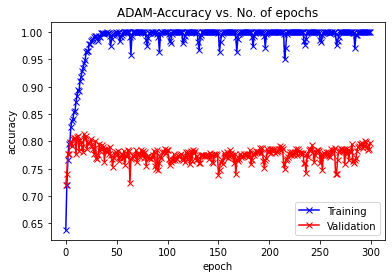

In [164]:
plot_accuracies(history_adam,'ADAM')

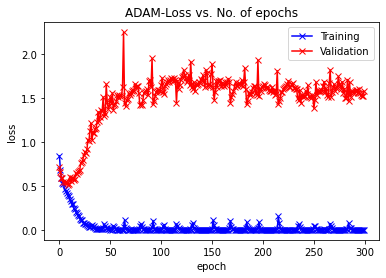

In [163]:
plot_losses(history_adam,'ADAM')

In [165]:
'''
textfile = open("adam_300_history.txt", "w")
for element in history_adam:
    textfile.write(str(element) + "\n")
textfile.close()
'''

####Test with ADAM [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **optimizers**. Which one is more preferable? Why?

Mean Loss: 0.448 
Mean Acc: 0.799 
Mean Macro Precision: 0.8029543536667693 
Mean Macro Recall: 0.7989999999999999 
Mean Macro F1 Score: 0.7987885326843033


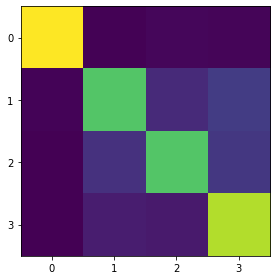

In [226]:
# Test CNN
# load best model
best_path = "models/best_cnn_adam.pth"
model = torch.load(best_path)

# evaluate on test set
model = model.eval()
y_preds = []
y_labels = []

for image in test_dataset:
    prediction = predict_image(image,model)
    label = image[1] # image[0] has the image, image[1] has the label tensor
    y_preds.append(prediction)
    y_labels.append(label)


cfm = confusion_matrix(y_labels,y_preds)
acc = accuracy_score(y_labels,y_preds)
pre = precision_score(y_labels,y_preds,average='macro')
recall = recall_score(y_labels,y_preds,average='macro')
f1 = f1_score(y_labels,y_preds,average='macro')
losses = mean_squared_error(y_labels,y_preds)

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cfm)
# We want to show all ticks...
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))

fig.tight_layout()
plt.show()

### On training, Adams optimizer performed better, when you look at training loss and accuracy it is really high compared to SGD. But on test set i observed that Adams optimizer performs slightly worse than SGD. I think this is because the difference on batch size. Too large batch size leads to poor generalization. I used batches of 64 on Adam, 32 on SGD. I think if i used batch size 32 on Adam it would perform better than SGD on testing too. I observed importance of batch size as a hyperparameter

###Transfer Learning [25 pts.]

Instead of training CNNs from scratch, you can use pretrained models and apply them to your task. Transfer learning is a machine learning technique where you can reuse a pretrained machine learning model as a starting point for your own task. In this question, you will experiment with it and try to understand why it is used.

####Training with Transfer Learning [15 pts.]

Get pretrained ResNet18 model from torchvision.models and finetune your model up to 20 epochs with properly processed inputs, i.e. call your "get_dataset". This time use transfer learning. Tune your learning rate, weight decay. Save your best model as "best_cnn_transfer.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

Let's define the model by extending an ImageClassificationBase class which contains helper methods for training & validation.

In [201]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [202]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [203]:
import torchvision.models as models

class ResNet18(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet18(pretrained=True) ## WE SELECT RESNET ARCHITECTURE ON HERE
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, len(classes))
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))

In [212]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    previous_best = 0
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result) # print the results at the end of each epoch
        history.append(result)
        if previous_best < result['val_acc']:
            previous_best = result['val_acc']
            print('saving best model with val_acc: {:.4f}'.format(result['val_acc']))
            torch.save(model,'models/best_cnn_transfer.pth')
    return history

Since i work on Collab, i use a GPU, we define a couple of helper functions (get_default_device & to_device) and a helper class DeviceDataLoader to move our model & data to the GPU as required.

In [213]:
device = get_default_device()
device

device(type='cpu')

In [214]:
# HINT: note that your training time should not take more than 2 hours.
# TODO:
# Pick your hyper parameters
max_epoch = 20
learning_rate = 1e-1 # try learning rate from the interval [1e-1, 1e-4]
weight_decay = 1
use_gpu = torch.cuda.is_available()

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

train_dl = DeviceDataLoader(train_loader,device) # Loading dataloaders to GPU to accelarate speed
val_dl = DeviceDataLoader(valid_loader,device)

In [215]:
# initialize your network
model = to_device(ResNet18(), device)

Before we begin training, let's instantiate the model once again and see how it performs on the validation set with the initial set of parameters.

In [208]:
evaluate(model, val_dl)

{'val_loss': 1.4055992364883423, 'val_acc': 0.24882812798023224}

In [216]:
# HINT: note that your training time should not take more than 2 hours.
# TODO:
# Pick your hyper parameters
max_epoch = 20
learning_rate = 1e-1 # try learning rate from the interval [1e-1, 1e-4] ## smaller than 1e-2 becomes worse
weight_decay = 0.1
use_gpu = torch.cuda.is_available()
# define your loss function
optimizer = torch.optim.SGD

In [217]:
history_transfer = fit(max_epoch, learning_rate, model, train_dl, val_dl, optimizer)

Epoch [0], train_loss: 0.9025, val_loss: 0.8406, val_acc: 0.8975
saving best model with val_acc: 0.8975


/Users/utkukalkanli/opt/anaconda3/envs/HW3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ResNet18. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch [1], train_loss: 0.8110, val_loss: 0.8326, val_acc: 0.9074
saving best model with val_acc: 0.9074
Epoch [2], train_loss: 0.7880, val_loss: 0.8307, val_acc: 0.9162
saving best model with val_acc: 0.9162
Epoch [3], train_loss: 0.7726, val_loss: 0.8328, val_acc: 0.9129
Epoch [4], train_loss: 0.7655, val_loss: 0.8526, val_acc: 0.8910
Epoch [5], train_loss: 0.7623, val_loss: 0.8339, val_acc: 0.9082
Epoch [6], train_loss: 0.7603, val_loss: 0.8391, val_acc: 0.9010
Epoch [7], train_loss: 0.7587, val_loss: 0.8276, val_acc: 0.9102
Epoch [8], train_loss: 0.7553, val_loss: 0.8306, val_acc: 0.9080
Epoch [9], train_loss: 0.7548, val_loss: 0.8272, val_acc: 0.9168
saving best model with val_acc: 0.9168
Epoch [10], train_loss: 0.7542, val_loss: 0.8311, val_acc: 0.9088
Epoch [11], train_loss: 0.7526, val_loss: 0.8331, val_acc: 0.9076
Epoch [12], train_loss: 0.7526, val_loss: 0.8285, val_acc: 0.9109
Epoch [13], train_loss: 0.7516, val_loss: 0.8278, val_acc: 0.9156
Epoch [14], train_loss: 0.7517, va

In [220]:
def plot_accuracies_tf(history,title):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title(title+'-Accuracy vs. No. of epochs');

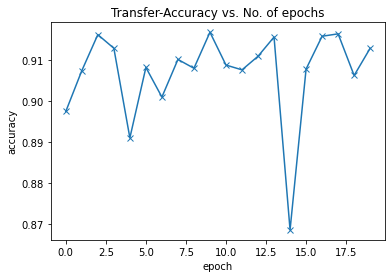

In [221]:
plot_accuracies_tf(history_transfer, 'Transfer')

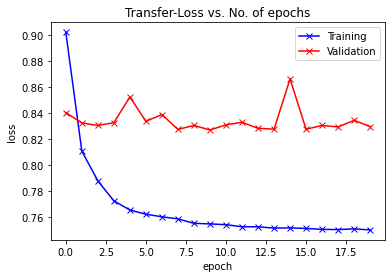

In [223]:
plot_losses(history_transfer, 'Transfer')

In [225]:
'''
textfile = open("transfer_20_history.txt", "w")
for element in history_transfer:
    textfile.write(str(element) + "\n")
textfile.close()
'''

'\ntextfile = open("transfer_20_history.txt", "w")\nfor element in history_transfer:\n    textfile.write(str(element) + "\n")\ntextfile.close()\n'

####Test for Transfer Learning [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Explain the advantages of using transfer learning. Is it better to reuse a pretrained model instead of training a model from scratch? Why?

Mean Loss: 0.157 
Mean Acc: 0.9125 
Mean Macro Precision: 0.913223853457093 
Mean Macro Recall: 0.9124999999999999 
Mean Macro F1 Score: 0.9124601088050073


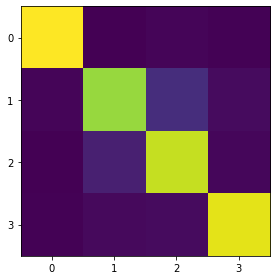

In [222]:
# Test CNN
# load best model
best_path = "models/best_cnn_transfer.pth"
model = torch.load(best_path)

# evaluate on test set
model = model.eval()
y_preds = []
y_labels = []

for image in test_dataset:
    prediction = predict_image(image,model)
    label = image[1] # image[0] has the image, image[1] has the label tensor
    y_preds.append(prediction)
    y_labels.append(label)


cfm = confusion_matrix(y_labels,y_preds)
acc = accuracy_score(y_labels,y_preds)
pre = precision_score(y_labels,y_preds,average='macro')
recall = recall_score(y_labels,y_preds,average='macro')
f1 = f1_score(y_labels,y_preds,average='macro')
losses = mean_squared_error(y_labels,y_preds)

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cfm)
# We want to show all ticks...
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))

fig.tight_layout()
plt.show()

### It is better to use pre-trained model from scratch since pre-trained models has trained on large and well pre-processed datasets, weights they have are valuable 
### Training from scratch is not efficient in terms of accuracy, since we dont have the ability to find that large and great dataset, also resnet18 is trained on ImageNet on large computers that has cuda etc. It would take years to compute that kind of large information for us. Accuracy on pretrained models were higher, performing better on other perfmorming metrics too. Also, transfer learning is easier since you only have to train the fully connected layer

### Transfer learning performance metrics are far better than our trained model, SGD had mean acc %81, Adam had mean acc %80 but transfer learning has mean acc % 91, precision recall and F1 scores has the same ratio as mean accuracy